In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Для курсовой работы Андрея Кривоносова мы решили спарсить данные с ebay: продаваемые там телефоны, их марки и характеристики. На основне этих данныех Андрей далее будет определять изменение в истинном спросе потребителей на товар после ажиотажа перед началом продаж. 

Сначала мы спарсили ссылки на страницы, а потом заставили компьютер пройтись по всем ссылкам, вытащить названия телефонов и ссылки на их характеристики, а потом добавить эти характеристики к до этого полученной информации. Далее мы решили привести данные в адекватный вид: обработали названия, выделили марки в отдельную колонку. 

Потом мы составили несколько гистограммок, на которых показали разные взаимосвязи наших данных. Продолжение работы вы можете увидеть далее:

In [ ]:
# гистограмма (марка телефона, количесво в выбоорке)
# гистограмма (цена, количество телефонов)
# гистограмма (марка, сумма продаж)
# гистограмма (марка, средняя цена)

# описание статистики, цель исследования, гипотеза - перед запуском продумкта на рынок создается чрезсреный ажиотаж, за счет которого реальная стоимость товара переоценивается потребителями
# полученные данные необходимы для понимания спроса на товары после их запуска

_____

Предобработка:

In [ ]:
df_items = pd.read_csv('Names.csv')
df_items.drop('Unnamed: 0', axis=1, inplace = True)

In [ ]:
df_items.dropna(subset=['Link'], inplace=True)
df_items.reset_index(inplace=True)
df_items.drop('index', axis=1, inplace = True)
df_items.isna().sum()

level_0          0
Title            0
Price            0
Shipping_cost    0
Sales_Count      0
Sales_Value      0
Link             0
dtype: int64

In [ ]:
df_items

,level_0,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link
0,0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,$337.59,$0.00,"19,787","$6,679,958.00",https://www.ebay.com/itm/254604777645?nordt=tr...
1,1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,$266.28,$0.00,"12,440","$3,312,560.60",https://www.ebay.com/itm/254187678666?nordt=tr...
2,2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,$359.11,$16.93,"12,224","$4,389,742.37",https://www.ebay.com/itm/363183815277?nordt=tr...
3,3,Apple iPhone X 64GB Factory Unlocked Phone - V...,$231.98,$16.50,"11,781","$2,732,899.88",https://www.ebay.com/itm/382605209867?nordt=tr...
4,4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,$263.59,$15.34,"10,020","$2,641,203.85",https://www.ebay.com/itm/382446518910?nordt=tr...
...,...,...,...,...,...,...,...
1750,1750,Samsung Galaxy Note 10+ Plus 5G N976U (AT&T Un...,$371.31,$5.00,68,"$25,249.32",https://www.ebay.com/itm/324700579327?nordt=tr...
1751,1751,Samsung Galaxy S22 Ultra 5G S908U 512GB Red (F...,$869.08,$25.26,65,"$56,490.35",https://www.ebay.com/itm/325275689582?nordt=tr...
1752,1752,Samsung N970 Galaxy Note 10 256GB Verizon 4G L...,$260.65,$0.00,77,"$20,069.74",https://www.ebay.com/itm/401985990556?nordt=tr...
1753,1753,BlackBerry Classic Q20 - Verizon (Unlocked) 4G...,$93.93,$15.48,66,"$6,199.34",https://www.ebay.com/itm/402750536683?nordt=tr...


In [ ]:
import re

def Sales_Value(value):
  pattern = r'\$|,'
  clean_value = re.sub(pattern, '', value)
  numeric_value = float(clean_value)
  return numeric_value


df_items.Price = df_items.Price.apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df_items.Shipping_cost = df_items.Shipping_cost.apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df_items.Sales_Count = df_items.Sales_Count.apply(lambda x: float(re.sub(",", "", x))) 
df_items.Sales_Value = df_items.Sales_Value.apply(lambda x: Sales_Value(x))

In [ ]:
df_items

,level_0,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link
0,0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,337.59,0.00,19787.0,6679958.00,https://www.ebay.com/itm/254604777645?nordt=tr...
1,1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,266.28,0.00,12440.0,3312560.60,https://www.ebay.com/itm/254187678666?nordt=tr...
2,2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,359.11,16.93,12224.0,4389742.37,https://www.ebay.com/itm/363183815277?nordt=tr...
3,3,Apple iPhone X 64GB Factory Unlocked Phone - V...,231.98,16.50,11781.0,2732899.88,https://www.ebay.com/itm/382605209867?nordt=tr...
4,4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,263.59,15.34,10020.0,2641203.85,https://www.ebay.com/itm/382446518910?nordt=tr...
...,...,...,...,...,...,...,...
1750,1750,Samsung Galaxy Note 10+ Plus 5G N976U (AT&T Un...,371.31,5.00,68.0,25249.32,https://www.ebay.com/itm/324700579327?nordt=tr...
1751,1751,Samsung Galaxy S22 Ultra 5G S908U 512GB Red (F...,869.08,25.26,65.0,56490.35,https://www.ebay.com/itm/325275689582?nordt=tr...
1752,1752,Samsung N970 Galaxy Note 10 256GB Verizon 4G L...,260.65,0.00,77.0,20069.74,https://www.ebay.com/itm/401985990556?nordt=tr...
1753,1753,BlackBerry Classic Q20 - Verizon (Unlocked) 4G...,93.93,15.48,66.0,6199.34,https://www.ebay.com/itm/402750536683?nordt=tr...


In [ ]:
brands_list = ['Apple', 'Samsung', 'Huawei', 'Xiaomi', 'Oppo', 'OnePlus', 'Google', 'Motorola', 'Sony', 'LG', 'HTC', 'Nokia', 'BlackBerry', 'Lenovo', 'Asus', 'ZTE', 'Alcatel', 'Vivo', 'Realme', 'Honor']
brands_regex = re.compile('('+ '|'.join(brands_list) + ')', flags=re.IGNORECASE)

df_items['brand'] = df_items['Title'].str.extract(brands_regex)
df_items['brand'] = df_items['brand'].apply(lambda x: x.lower() if type(x) == str else x)
df_items

,level_0,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,brand
0,0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,337.59,0.00,19787.0,6679958.00,https://www.ebay.com/itm/254604777645?nordt=tr...,apple
1,1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,266.28,0.00,12440.0,3312560.60,https://www.ebay.com/itm/254187678666?nordt=tr...,apple
2,2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,359.11,16.93,12224.0,4389742.37,https://www.ebay.com/itm/363183815277?nordt=tr...,apple
3,3,Apple iPhone X 64GB Factory Unlocked Phone - V...,231.98,16.50,11781.0,2732899.88,https://www.ebay.com/itm/382605209867?nordt=tr...,apple
4,4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,263.59,15.34,10020.0,2641203.85,https://www.ebay.com/itm/382446518910?nordt=tr...,apple
...,...,...,...,...,...,...,...,...
1750,1750,Samsung Galaxy Note 10+ Plus 5G N976U (AT&T Un...,371.31,5.00,68.0,25249.32,https://www.ebay.com/itm/324700579327?nordt=tr...,samsung
1751,1751,Samsung Galaxy S22 Ultra 5G S908U 512GB Red (F...,869.08,25.26,65.0,56490.35,https://www.ebay.com/itm/325275689582?nordt=tr...,samsung
1752,1752,Samsung N970 Galaxy Note 10 256GB Verizon 4G L...,260.65,0.00,77.0,20069.74,https://www.ebay.com/itm/401985990556?nordt=tr...,samsung
1753,1753,BlackBerry Classic Q20 - Verizon (Unlocked) 4G...,93.93,15.48,66.0,6199.34,https://www.ebay.com/itm/402750536683?nordt=tr...,blackberry


____

Предварительный анализ:

In [ ]:
df_items.describe()

,level_0,Price,Shipping_cost,Sales_Count,Sales_Value
count,1755.000000,1755.000000,1755.000000,1755.000000,1.755000e+03
mean,877.000000,222.981208,10.796541,557.296866,1.245443e+05
std,506.769178,179.315166,10.213965,1402.564521,3.930160e+05
min,0.000000,7.730000,0.000000,65.000000,1.507060e+03
25%,438.500000,99.365000,0.000000,114.000000,1.644781e+04
50%,877.000000,167.020000,10.790000,182.000000,3.347414e+04
75%,1315.500000,288.690000,15.480000,365.000000,8.393401e+04
max,1754.000000,1388.920000,111.670000,19787.000000,6.679958e+06


In [ ]:
df_items.corr()

<ipython-input-108-05b9cc63d60f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_items.corr()


,level_0,Price,Shipping_cost,Sales_Count,Sales_Value
level_0,1.000000,0.044190,-0.100107,-0.460558,-0.376086
Price,0.044190,1.000000,0.024952,0.001104,0.142234
Shipping_cost,-0.100107,0.024952,1.000000,-0.000593,-0.010158
Sales_Count,-0.460558,0.001104,-0.000593,1.000000,0.934202
Sales_Value,-0.376086,0.142234,-0.010158,0.934202,1.000000


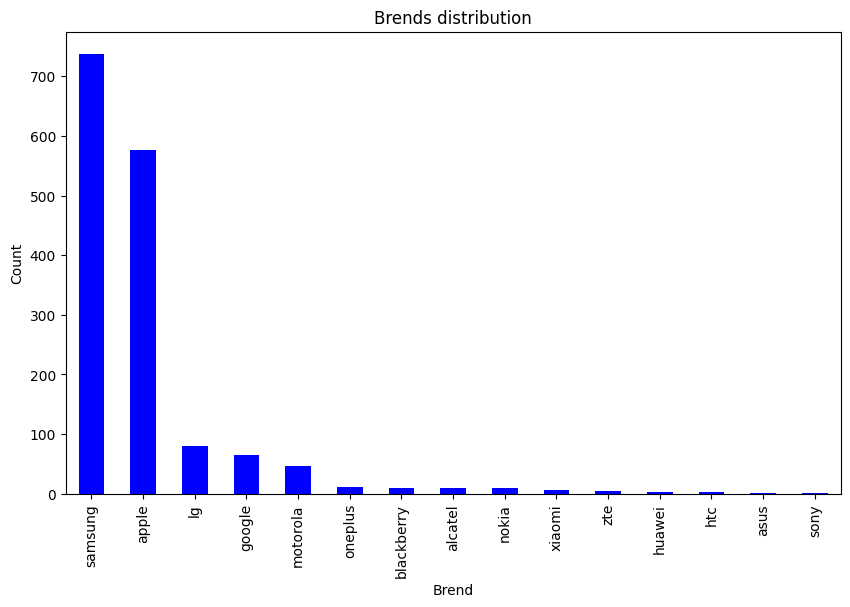

In [ ]:
# Гистограмма распределения брендов
brands = df_items.brand.value_counts()
plt.figure(figsize=(10,6))
brands.plot(kind='bar', color='b')
plt.title('Brends distribution')
plt.xlabel('Brend')
plt.ylabel('Count')
plt.show()

Как мы видим с спарсенных данных самыми популярными марками являются Samsung и Apple, во вторую по популярности можно объеденить группу LG, Google и Motorola, остальные бренды не так распространены по количеству продаж. 

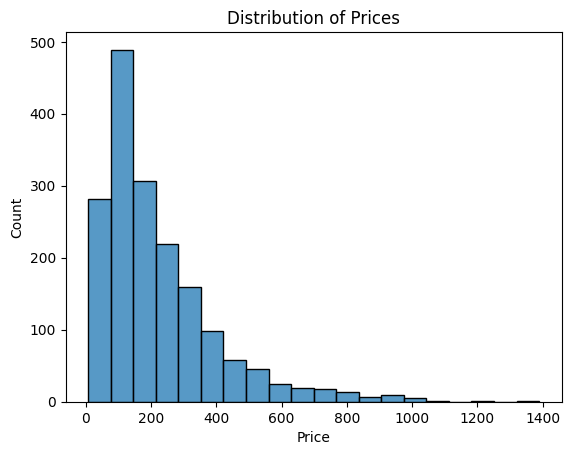

In [ ]:
# Гистограмма распределения цен
sns.histplot(df_items['Price'], bins=20)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Распределение цен марок телефонов похоже на нормальное и имеет моду около 100 долларов. 

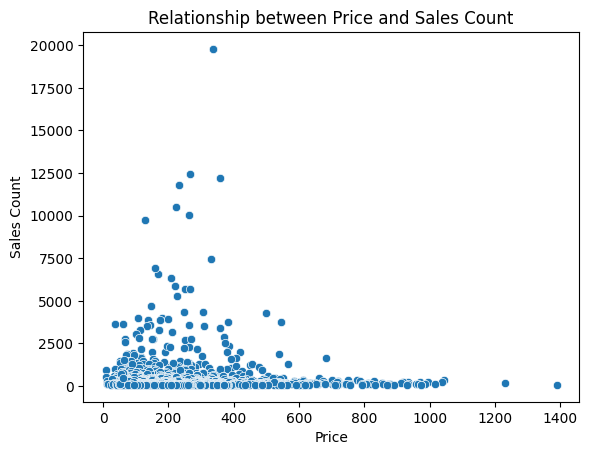

In [ ]:
# Диаграмма рассеяния количества продаж и стоимости товаров
sns.scatterplot(x='Price', y='Sales_Count', data=df_items)
plt.title('Relationship between Price and Sales Count')
plt.xlabel('Price')
plt.ylabel('Sales Count')
plt.show()

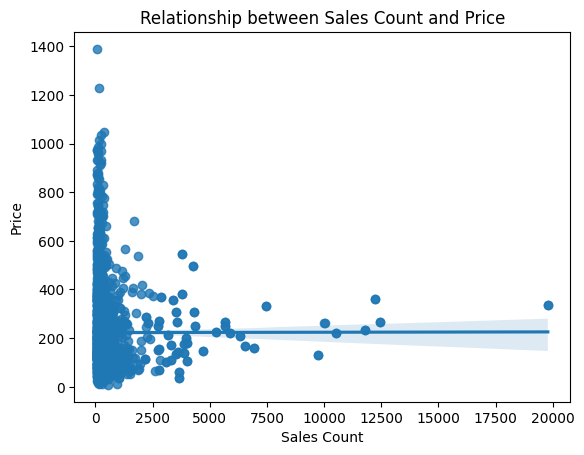

In [ ]:
# График зависимости стоимости товара от его количества продаж
sns.regplot(x='Sales_Count', y='Price', data=df_items)
plt.title('Relationship between Sales Count and Price')
plt.xlabel('Sales Count')
plt.ylabel('Price')
plt.show()

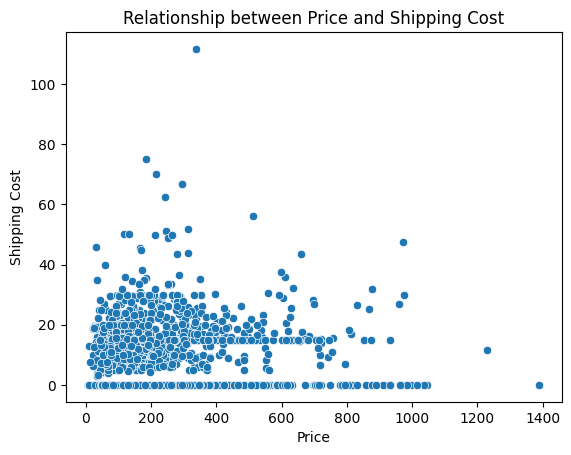

In [ ]:
# Диаграмма рассеяния между стоимостью товара и стоимостью доставки
sns.scatterplot(x='Price', y='Shipping_cost', data=df_items)
plt.title('Relationship between Price and Shipping Cost')
plt.xlabel('Price')
plt.ylabel('Shipping Cost')
plt.show()

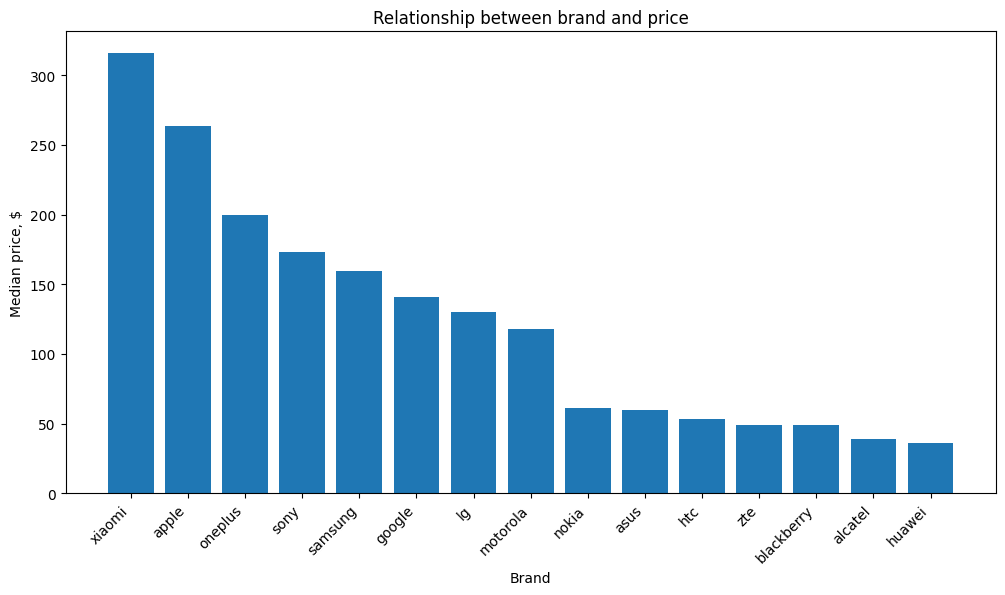

In [ ]:
# Диаграмма распределения брендов и  средних цен
brand_prices = df_items.groupby('brand').agg({'Price': 'median'}).sort_values(by='Price', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(brand_prices.index, brand_prices['Price'])

ax.set_xlabel('Brand')
ax.set_ylabel('Median price, $')
ax.set_title('Relationship between brand and price')

plt.xticks(rotation=45, ha='right')

plt.show()